# Breast Cancer OS and PFS Dataset

Maching Leanring to predict survival time in breast cancer patients

## Part 1: Import essential libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

['.ipynb_checkpoints', 'breast_cancer_predictions_ML.ipynb', 'breast_cancer_data_ML.csv']


## Part 2: Importing and Understanding Datasets

In [20]:
df = pd.read_csv("breast_cancer_data_ML.csv")

#### Verifying it as a 'dataframe' object in pandas

In [21]:
type(df)

pandas.core.frame.DataFrame

#### Getting shape of dataset

In [22]:
df.shape

(198, 22)

#### Describing dataset

In [23]:
df.describe()

,Patient,MAF of gene used at baseline,MAF of gene used at 4 weeks,CTCs counts at baseline,CTCs counts at 4 weeks,AGE,PS,OS at baseline,Status OS,PFS at baseline,Status PFS,PFS from weeks 4,OS from weeks 4
count,198.000000,198.000000,191.000000,198.000000,196.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,161.338384,11.149242,2.402723,413.161616,167.908163,55.888889,0.464646,30.277778,0.722222,13.540404,0.954545,12.595960,29.318182
std,88.570266,17.464211,7.691348,2777.528762,1985.385962,10.956202,0.500013,16.408448,0.449039,11.754074,0.208827,11.749863,16.388518
min,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,91.750000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,15.000000,0.000000,6.000000,1.000000,5.000000,14.000000
50%,161.500000,3.890000,0.000000,4.000000,0.000000,57.000000,0.000000,30.000000,1.000000,10.000000,1.000000,9.000000,29.000000
75%,237.500000,14.067500,1.015000,32.500000,3.000000,65.000000,1.000000,43.750000,1.000000,17.750000,1.000000,16.750000,42.750000
max,313.000000,84.800000,54.980000,30000.000000,27710.000000,77.000000,1.000000,62.000000,1.000000,60.000000,1.000000,59.000000,61.000000


#### Printing first 5 rows

In [24]:
df.head()

,Patient,Mutation,MAF of gene used at baseline,MAF of gene used at 4 weeks,CTCs counts at baseline,CTCs counts at 4 weeks,AGE,PS,metastatic site,N of met. Sites,...,OS at baseline,Status OS,PFS at baseline,Status PFS,PFS from weeks 4,OS from weeks 4,meno.status,MFI,Met.sites,Histology
0,1,No mutated,0.00,NaN,0,0.0,69,0,Visceral,< 3,...,20,1,6,1,5,19,Postmenopausal,Sup à 6 months,Other,Other
1,3,PTEN,9.44,0.00,0,0.0,73,0,No visceral,< 3,...,33,1,16,1,15,32,Postmenopausal,Sup à 6 months,Other,Lobular
2,5,PTEN,4.27,0.00,6,0.0,37,0,Visceral,< 3,...,61,0,23,1,22,60,Premenopausal,Sup à 6 months,Liver +/- other,Other
3,6,TP53,14.60,0.34,7,1.0,41,1,Visceral,>=3,...,31,1,8,1,7,30,Premenopausal,Sup à 6 months,Other,Lobular
4,11,PIK3CA,9.62,0.00,10,0.0,48,0,No visceral,>=3,...,31,1,13,1,12,30,Premenopausal,<= 6 months,Other,Other


## Understanding Columns

#### Features in the Dataset

- **Patient ID:** Identifier, not feature for prediction.
- **Mutation:** Genetic mutations present in cancerous cells (e.g., PTEN, TP53, PIK3CA) which can influence the aggressiveness of the cancer and potential response to therapy.
- **MAF of Gene at Baseline and 4 Weeks:** Measures the mutation allele frequency (MAF) at baseline and after 4 weeks, providing insights into the genetic evolution of the tumor under treatment.
- **CTCs Counts at Baseline and 4 Weeks:** Circulating tumor cells (CTCs) can indicate the extent of tumor burden and might predict metastasis.
- **Age:** Age of the patient at diagnosis, which is a known risk factor in breast cancer prognosis.
- **PS (Performance Status):** A measure of how the disease affects a patient's daily living abilities; lower scores typically indicate better functioning.
- **Metastatic Site:** The location of metastases can influence prognosis; for example, visceral metastases are often associated with poorer outcomes compared to bone metastases.
- **Number of Metastatic Sites:** Indicates disease burden; more sites can correlate with a more advanced or aggressive disease.
- **Subtype:** Breast cancer subtype (e.g., Triple Negative, RH+) which is crucial for determining treatment strategy and prognosis.
- **Tumor Grade:** Indicates the aggressiveness of the tumor based on how much the cancer cells differ from healthy cells.
- **OS (Overall Survival) at Baseline and OS from Weeks 4:** Survival time from the initial diagnosis and from week 4 respectively.
- **Status OS:** The status (e.g., alive, deceased) at the last follow-up, potentially used as a target variable for survival analysis.
- **PFS (Progression-Free Survival) at Baseline and PFS from Weeks 4:** Time during and after the treatment that the patient lives without the disease worsening.
- **Status PFS:** Similar to Status OS, indicates whether the disease has progressed as of the last follow-up.
- **Menopausal Status:** Hormonal status can impact the disease's behavior and treatment responses.
- **MFI (Metastatic Free Interval):** Time between initial diagnosis and the development of metastases.
- **Metastatic Sites:** Specific sites where metastases are present, which could be critical for prognosis.
- **Histology:** The study of the tissue origin and structure of the cancer; certain histological types may be more aggressive.

#### Checking for missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient                       198 non-null    int64  
 1   Mutation                      198 non-null    object 
 2   MAF of gene used at baseline  198 non-null    float64
 3   MAF of gene used at 4 weeks   191 non-null    float64
 4   CTCs counts at baseline       198 non-null    int64  
 5   CTCs counts at 4 weeks        196 non-null    float64
 6   AGE                           198 non-null    int64  
 7   PS                            198 non-null    int64  
 8   metastatic site               197 non-null    object 
 9   N of met. Sites               197 non-null    object 
 10  subtype                       198 non-null    object 
 11  Tumor grade                   181 non-null    object 
 12  OS at baseline                198 non-null    int64  
 13  Statu

#### Update: Missing values detected (see above)

Breakdown of where missing values are:

- MAF of gene used at 4 weeks: Out of 198 entries, only 191 are non-null. This means there are 7 missing values in this column.

- CTCs counts at 4 weeks: 196 non-null entries suggest 2 missing values.

- metastatic site: With 197 non-null entries, there is 1 missing value.

- N of met. Sites: Similarly, with 197 non-null entries, there is 1 missing value.

- Tumor grade: There are 17 missing values since only 181 out of 198 entries are non-null.

- meno.status: This has 2 missing values, with 196 non-null entries.

- MFI: There are 4 missing values, as it has 194 non-null entries.

- Met.sites: This also indicates 1 missing value, with 197 non-null entries.

- Histology: There are 3 missing values, with 195 non-null entries.

Handling of missing values is required before analysis can proceed. Techniques such as imputation, removal, or substitution, can be used depending on significance of data and the intended analysis.

#### Analysing potential 'target' variable

In [26]:
df["OS from weeks 4"].describe()

count    198.000000
mean      29.318182
std       16.388518
min        2.000000
25%       14.000000
50%       29.000000
75%       42.750000
max       61.000000
Name: OS from weeks 4, dtype: float64

In [27]:
df["OS from weeks 4"].unique()

array([19, 32, 60, 30, 59, 38, 12,  7, 51, 17, 61,  9, 37, 29, 27, 22, 48,
       31, 20, 11, 58, 40,  2, 35,  8, 18, 55, 50, 33,  4, 10, 26, 44, 57,
       45, 15, 54,  3, 24, 52, 53, 36, 49, 47, 14, 46, 39, 21,  5,  6, 28,
       13, 43, 42, 16, 34, 41])

#### Target variables has a range of values and so clustering or regression techniques will be used

### Checking correlation between columns
Selecting columns with integers only for now

In [28]:
integer_columns = df.select_dtypes(include=['int64']).columns
print(df[integer_columns].corr()["OS from weeks 4"].abs().sort_values(ascending=False))

OS from weeks 4            1.000000
OS at baseline             0.999853
PFS from weeks 4           0.612825
PFS at baseline            0.612645
Status OS                  0.583899
Patient                    0.262240
PS                         0.092468
Status PFS                 0.092162
AGE                        0.010319
CTCs counts at baseline    0.001602
Name: OS from weeks 4, dtype: float64


In [29]:
integer_columns = df.select_dtypes(include=['int64']).columns
print(df[integer_columns].corr()["Status OS"].abs().sort_values(ascending=False))

Status OS                  1.000000
OS at baseline             0.584720
OS from weeks 4            0.583899
PFS at baseline            0.480180
PFS from weeks 4           0.479336
Status PFS                 0.351866
CTCs counts at baseline    0.080276
Patient                    0.039616
PS                         0.035169
AGE                        0.017655
Name: Status OS, dtype: float64


## Exploratory Data Analysis

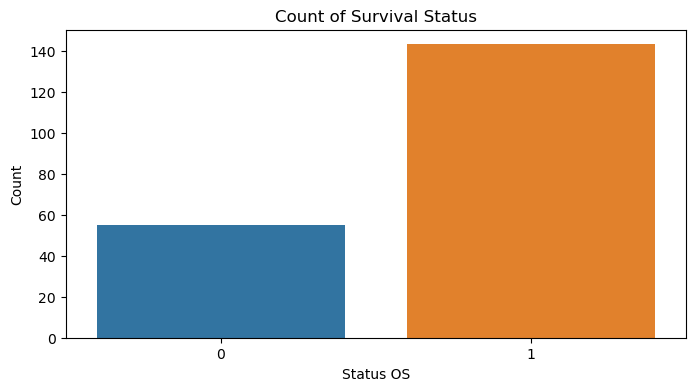

Status OS
1    143
0     55
Name: count, dtype: int64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for plotting
plt.figure(figsize=(8, 4))

# Plotting 'Status OS' counts
sns.countplot(x=df["Status OS"])

# Adding title and labels to improve clarity
plt.title('Count of Survival Status')
plt.xlabel('Status OS')
plt.ylabel('Count')

# Display the plot
plt.show()

# Printing the value counts of 'Status OS'
target_status_OS = df["Status OS"].value_counts()
print(target_status_OS)


# Kaplan-Meier Curve

In [31]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


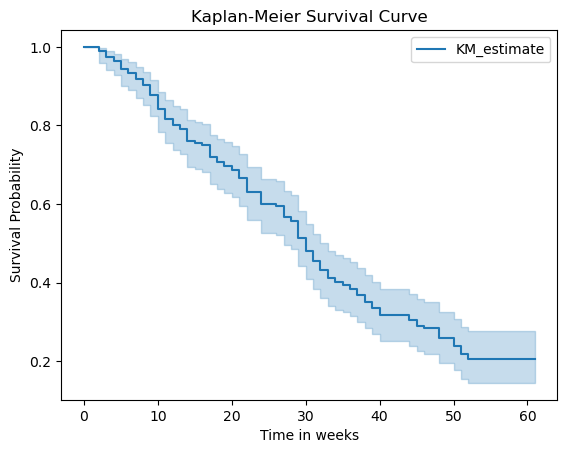

In [32]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Inititative KaplanMeierFitter model
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=df["OS from weeks 4"], event_observed=df["Status OS"])

# Plot the KM survival curve
kmf.plot_survival_function()

# Add title and labels
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time in weeks')
plt.ylabel('Survival Probability')

# Show plot
plt.show()

**Final figure will be plotted in R using ggplot2 and survminer packages**

In [16]:
from lifelines import CoxPHFitter

In [17]:
# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='OS from weeks 4', event_col='Status OS', show_progress=True)

# Print the summary of the model
print(cph.summary)

# Plot the coefficients of the model
cph.plot()

# Show the plot
plt.show()

ValueError: could not convert string to float: 'TP53'

# Train Test Split

### Only using CTCs count and age as predictors to see

In [48]:
from sklearn.model_selection import train_test_split

X = df[["CTCs counts at baseline", "AGE"]]
y = df["OS from weeks 4"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

Y_pred_lr = lr.predict(X_test)

In [52]:
new_data = [[1500, 20]]  # Replace with actual feature values

# Predict the response for new data
predicted_value = lr.predict(new_data)

# Output the predicted value
print("Predicted Value:", predicted_value[0])

Predicted Value: 28.735297105037343


/home/rburke/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluation of Linear Regression Model

### Calculating: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Coefficient of Determination (R^2 Score)

**Importing libraries**

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Predict Test Set**

In [58]:
Y_pred = lr.predict(X_test)

**Calculate and predict evaluation metrics**

In [59]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, Y_pred)
rmse = mse ** 0.5
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Coefficient of Determination (R² Score)
r2 = r2_score(y_test, Y_pred)
print("R^2 Score:", r2)

Mean Absolute Error: 13.288829968651404
Mean Squared Error: 252.3849759361139
Root Mean Squared Error: 15.886628841139139
R^2 Score: -0.01678193306269482


#### Interpretation of Evaluation Metrics

**R² = -0.017:** The R² score is meant to indicate the proportion of variance in the dependent variable that is predictable from the independent variables. Values range from -∞ to 1, where:
- 1 indicates perfect prediction.
- 0 indicates that the model is no better than a model that would simply predict the mean of the target variable.
- Negative values (like -0.017) suggest that the model is worse than just predicting the mean of the dependent variable. This could happen if your model is overfitting, poorly specified, or if the underlying assumptions of linear regression are being violated (e.g., non-linearity, correlated errors).

**Mean Absolute Error (MAE):**
MAE = 13.29: This means that on average, the predictions of your model are approximately 13.29 units away from the actual data points. Whether this is acceptable depends on the scale of the OS from weeks 4 variable (the target variable) and its typical values. For example, if OS from weeks 4 ranges from 0 to 100, an MAE of 13.29 might be considered high, but if the range is 0 to 1000, it might be more acceptable.

**Mean Squared Error (MSE)**
MSE = 252.38: This is the average of the squares of the errors. The higher the MSE, the worse the model's performance, as it indicates that the model is making errors with greater magnitude.

**Root Mean Squared Error (RMSE):**
RMSE = 15.89: Similar to MAE but gives more weight to larger errors. An RMSE of 15.89, like MAE, should be evaluated against the range and scale of the target values. It indicates that typical prediction errors are about 15.89 units, which should be contextualized against the data range.

## Overall Evaluation: Very Bad

This result was expected as I was testing if I can actually create a functioning model, with a few features. I will add more and more and continue to evaluate to see if scores can be adjusteds into an acceptable range.